In [14]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

response = requests.get(url)

data = response.json()



In [11]:
episodes = data['_embedded']['episodes']

# Create a list to store the extracted attributes
attributes = ['id', 'url', 'name', 'season', 'number', 'type', 'airdate', 'airtime',
              'runtime', 'rating', 'summary', 'medium_image', 'original_image']

# Create an empty DataFrame
df = pd.DataFrame(columns=attributes)


for episode in episodes:
    episode_data = {}
    for attr in attributes:
        if attr == 'rating':
            episode_data[attr] = episode[attr]['average']
        elif attr == 'summary':
            episode_data[attr] = episode[attr].strip('<p>').strip('</p>')
        elif attr.endswith('_image'):
            episode_data[attr] = episode['image'][attr.split('_')[0]]
        else:
            episode_data[attr] = episode[attr]
    # Append the episode data to the DataFrame
    df = df.append(episode_data, ignore_index=True)

# Print the DataFrame
print(df)

         id                                                url  \
0    869671  https://www.tvmaze.com/episodes/869671/westwor...   
1    911201  https://www.tvmaze.com/episodes/911201/westwor...   
2    911204  https://www.tvmaze.com/episodes/911204/westwor...   
3    911205  https://www.tvmaze.com/episodes/911205/westwor...   
4    927174  https://www.tvmaze.com/episodes/927174/westwor...   
5    932057  https://www.tvmaze.com/episodes/932057/westwor...   
6    938404  https://www.tvmaze.com/episodes/938404/westwor...   
7    943065  https://www.tvmaze.com/episodes/943065/westwor...   
8    943066  https://www.tvmaze.com/episodes/943066/westwor...   
9    943067  https://www.tvmaze.com/episodes/943067/westwor...   
10  1214222  https://www.tvmaze.com/episodes/1214222/westwo...   
11  1440915  https://www.tvmaze.com/episodes/1440915/westwo...   
12  1440916  https://www.tvmaze.com/episodes/1440916/westwo...   
13  1440917  https://www.tvmaze.com/episodes/1440917/westwo...   
14  144636

C:\Users\keshav.bajaj\AppData\Local\Temp\ipykernel_12616\301574909.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(episode_data, ignore_index=True)
C:\Users\keshav.bajaj\AppData\Local\Temp\ipykernel_12616\301574909.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(episode_data, ignore_index=True)
C:\Users\keshav.bajaj\AppData\Local\Temp\ipykernel_12616\301574909.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(episode_data, ignore_index=True)
C:\Users\keshav.bajaj\AppData\Local\Temp\ipykernel_12616\301574909.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(episo

In [12]:
df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,rating,summary,medium_image,original_image
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,68,8,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,60,8,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [13]:
df.isnull().sum()

id                0
url               0
name              0
season            0
number            0
type              0
airdate           0
airtime           0
runtime           0
rating            0
summary           0
medium_image      0
original_image    0
dtype: int64

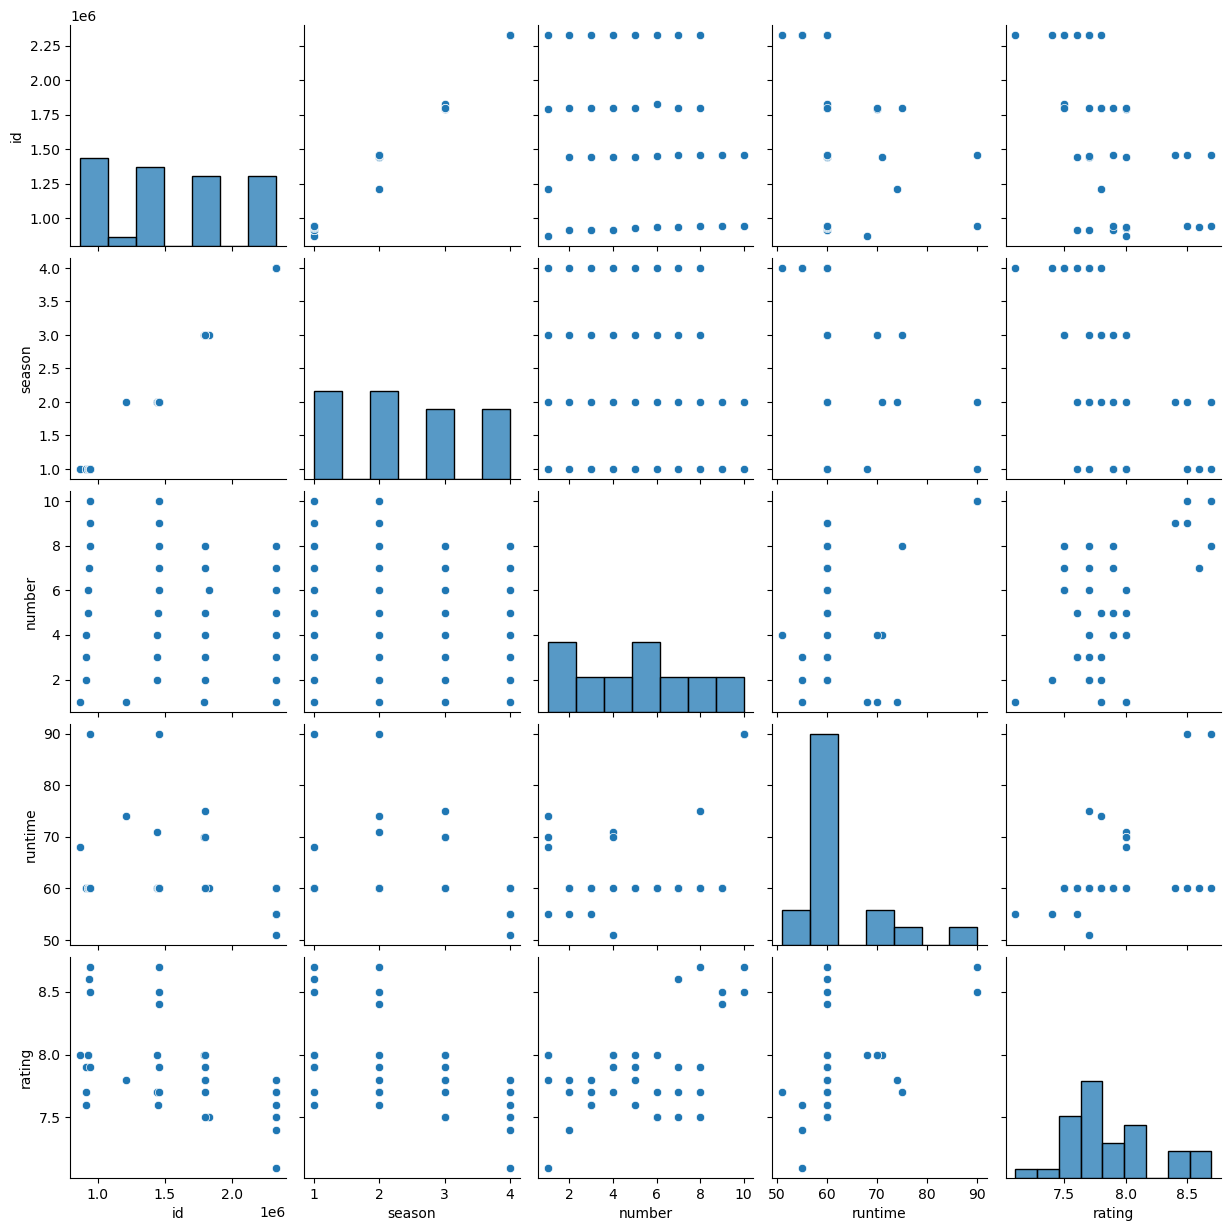

In [16]:
sns.pairplot(df)

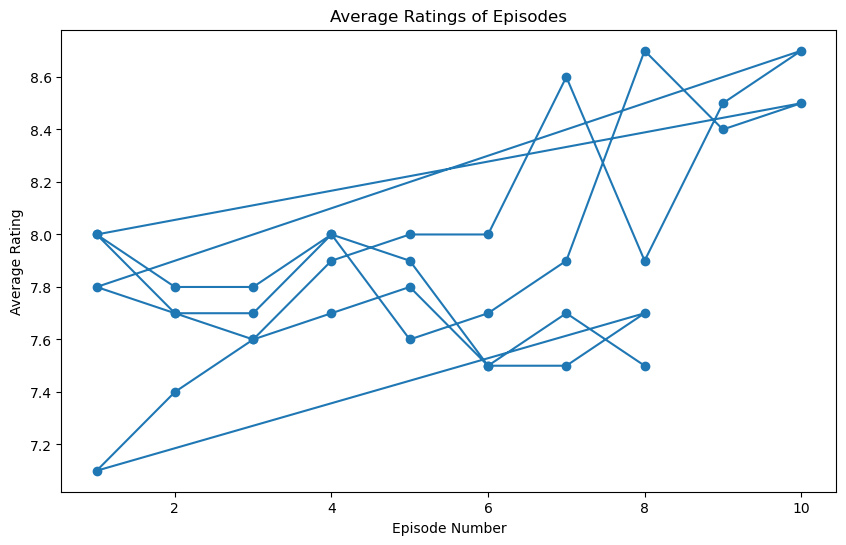

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(df['number'], df['rating'], marker='o')
plt.xlabel('Episode Number')
plt.ylabel('Average Rating')
plt.title('Average Ratings of Episodes')
plt.show()



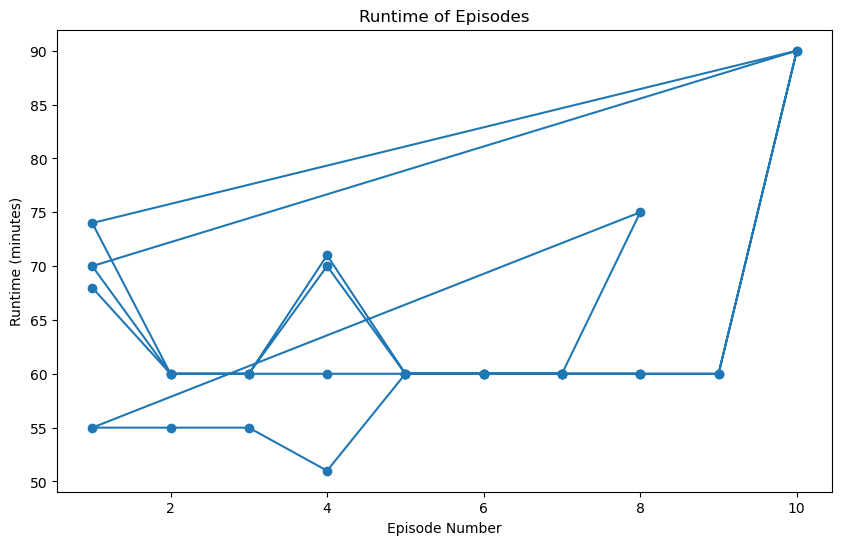

In [19]:
# Plotting the runtime of episodes
plt.figure(figsize=(10, 6))
plt.plot(df['number'], df['runtime'], marker='o')
plt.xlabel('Episode Number')
plt.ylabel('Runtime (minutes)')
plt.title('Runtime of Episodes')
plt.show()